In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"/content/TheSocialDilemma.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [3]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'Sentiment'],
      dtype='object')

In [4]:
df.drop(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date','hashtags', 'source', 'is_retweet'],axis=1,inplace=True)

In [5]:
df.head()

,text,Sentiment
0,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral
1,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral
2,Go watch “The Social Dilemma” on Netflix!\n\nI...,Positive
3,I watched #TheSocialDilemma last night. I’m sc...,Negative
4,The problem of me being on my phone most the t...,Positive


In [6]:
df.shape

(20068, 2)

In [7]:
df['Sentiment'].value_counts()

Positive    9513
Neutral     6982
Negative    3573
Name: Sentiment, dtype: int64

<Axes: >

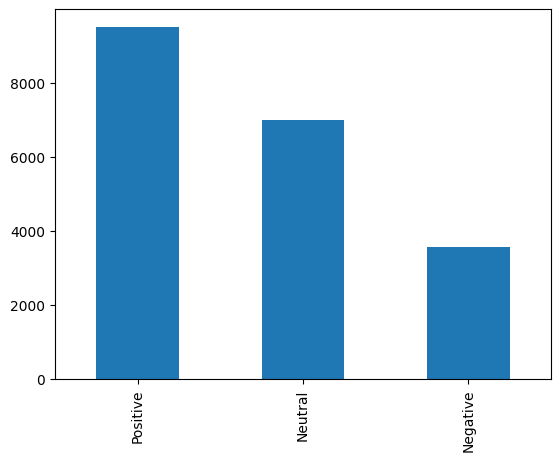

In [8]:
bars = df['Sentiment'].value_counts().plot.bar()
bars

In [9]:
df.isnull().sum()

text         0
Sentiment    0
dtype: int64

In [10]:
df.isna().sum()

text         0
Sentiment    0
dtype: int64

TEXT PREPROCESSING

In [11]:
import nltk

In [12]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [14]:
text=list(df["text"])

In [15]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)


In [18]:
df['text'] = corpus
df.head()

,text,Sentiment
0,musicmadmarc socialdilemma netflix facebook al...,Neutral
1,musicmadmarc socialdilemma netflix facebook ha...,Neutral
2,go watch social dilemma netflix best minute sp...,Positive
3,watched thesocialdilemma last night scared hum...,Negative
4,problem phone time trying watch thesocialdilemma,Positive


MODEL BUILDING

In [45]:
X = df['text']

y = df['Sentiment']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


FEATURE EXTRACTION (BOW)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [47]:
x_train=cv.fit_transform(X_train)

In [48]:
x_train.shape

(14047, 23563)

In [49]:
x_test=cv.transform(X_test)

In [50]:
x_test.shape

(6021, 23563)

In [53]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [54]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
r1=dc.predict(x_test)

In [56]:
r1

array(['Neutral', 'Negative', 'Neutral', ..., 'Positive', 'Neutral',
       'Neutral'], dtype=object)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,r1)

0.826274705198472

In [61]:
confusion_matrix(y_test,r1)

array([[ 655,  213,  235],
       [  72, 1854,  123],
       [ 133,  270, 2466]])

In [73]:
new=["Spent the day volunteering at the local animal shelter! It's heartwarming to see the impact we can make when we come together. #Volunteer #MakeADifference"]

In [74]:
new1=cv.transform(new)

In [76]:
predictions = dc.predict(new1)
predictions

array(['Positive'], dtype=object)